# Min Jus PBA - API local

Análisis exploratorio de datos

## Cargo librerías

In [1]:
#conda update -n base -c defaults conda

In [2]:
#!conda install -c plotly plotly

In [3]:
#conda install -c conda-forge lux-api

In [4]:
from IPython.display import display, Markdown

import datetime, warnings

warnings.filterwarnings('ignore')

import json 
import requests
from pandas import json_normalize

import numpy as np
import pandas as pd
import seaborn as sns

#import lux

from math import sqrt

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

#import plotly
from plotly import express as px
from plotly import graph_objects as go
from plotly import figure_factory as ff
from plotly.subplots import make_subplots

import missingno as msno


In [5]:
#display(plotly.__version__)
#display(pd.__version__)

In [6]:
# Format round off to two decimal places in pandas 
pd.options.display.float_format = '{: .2f}'.format

## Cargo funciones

In [7]:
def print_columns(df):
    display(Markdown('#### List of columns:'))
    text = '| '
    for x in range(0, df.shape[1]):
        text = text + df.columns.values[x] + ' | '
    return text

def explore_var(df,var,limit=20):
    cant=df.nunique()
    df_full = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
    df_full = df_full.sort_values(by=['counts'],ascending=False)
    topLimit= df_full[0:limit]
    t1='\nThere are **'+str(cant)+'** different value in the **'+str(var)+'** variable of the dataframe.'
    if cant<=1:
        t1='\nThere is **only one** different value in the **'+str(var)+'** variable of the dataframe.'
        t2 ='The value is:'  
    elif cant>=limit:
        t2='The list of the first **'+str(limit)+'**  values:'
        df_full = topLimit
    else:
        t2 ='The list of the **'+str(cant)+'**  values:'    
    display(Markdown(t1))
    display(Markdown(t2))
    return df_full

def print_last(df):
    display(df.tail(1))
    
def missing_zero_values_table(df):
    zero_val=df.isin([0]).sum(axis=0)
    mis_val=df.isnull().sum()
    l=len(df)
    mis_val_percent=100*df.isnull().sum()/l
    zero_val_percent=100*df.isin([0]).sum()/l
    mz_table=pd.concat([zero_val,zero_val_percent,mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
        columns={
            0:'Zero Values', 
            1:'% of Zero Values', 
            2:'Missing Values', 
            3:'% of Missing Values'}
    )
    mz_table['Total Missing Values']=mz_table['Zero Values']+mz_table['Missing Values']
    mz_table['% Total Missing Values']=100*mz_table['Total Missing Values']/l
    mz_table=mz_table[mz_table.iloc[:,4] != 0].sort_values(
    '% Total Missing Values', ascending=False).round(1)
    tc=str(df.shape[1])
    tr=str(df.shape[0])
    tcm=str(mz_table.shape[0])
    txt='Your selected dataframe has '+str(tc)+' columns and '+str(tr)+' Rows.'
    txt+='\nThere are '+str(tcm)+' columns that have missing values.'
    display(mz_table)
    return txt

def getEndpoint(URL,headers):
    df = pd.DataFrame()
    resp = requests.get(URL, headers = headers)
    if resp.status_code != 200:
        txt = 'error: ' + str(resp.status_code)
    else:
        txt = 'Success'

    dic = resp.json()
    df = json_normalize(dic)
    return txt, df



### Settings 

In [8]:
# Setting pandas df print
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)


In [9]:

# QA MODE
# headers_qa  = {"X-Api-Key": "rXkucPND.LKW9FlSqV71Ow07FLprFIMFM1VHjE7sK"}
# URL_PREFIX_qa = "http://10.42.8.33:8000/api/"

# headers  = headers_qa
# URL_PREFIX = URL_PREFIX_qa


# LOCAL MODE
headers_local  = {"X-Api-Key": "ATTRUJpi.YjxcyulWfq6YkcvzJkHtO425ajdFivZ8"}
URL_PREFIX_local = "http://localhost:8000/api/"

headers  = headers_local
URL_PREFIX = URL_PREFIX_local

## Defino Endpoint

In [10]:
URL = URL_PREFIX + "cons-capacidad-diaria"

df = pd.DataFrame()
rta, df = getEndpoint(URL,headers)
print(rta)

df

Success


id report_date  destino  capacidad
0        1  2021-12-20        2          3
1     3754  2021-11-25       66         90
2     1252  2021-11-25       60        300
3      418  2021-11-25       58         60
4     3337  2021-11-25       65        300
...    ...         ...      ...        ...
3749  2921  2020-10-05       65        224
3750   419  2020-10-05       59        214
3751  3338  2020-10-05       66        128
3752     2  2020-10-05       58         60
3753  2504  2020-10-05       64        156

[3754 rows x 4 columns]

## DF EDA

Exploratory Data Analysis of Data Frame

### Columns

In [11]:
print(print_columns(df))

#### List of columns:

| id | report_date | destino | capacidad | 


### Exploring variables

In [12]:
print()

var = 'destino'
v1 = explore_var(df[var],var,limit=10)
display(v1)
print()



There are **10** different value in the **destino** variable of the dataframe.

The list of the first **10**  values:

unique_values  counts
0             58     417
1             60     417
2             62     417
3             64     417
4             66     417
5             59     417
6             61     417
7             63     417
8             65     417
9              2       1

### Variable types

In [13]:
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           3754 non-null   int64 
 1   report_date  3754 non-null   object
 2   destino      3754 non-null   int64 
 3   capacidad    3754 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 117.4+ KB


### Tratamiento id

In [14]:
# Tratamiento de IDs para que tome la variable como categórica y no como numérica

column_dim = 'id'

df[column_dim].dtypes
if df[column_dim].dtypes == np.object:
    print('Realizado')
else:
    df[column_dim] = column_dim +'_id ' + df[column_dim].astype(str)
df


id report_date  destino  capacidad
0        id_id 1  2021-12-20        2          3
1     id_id 3754  2021-11-25       66         90
2     id_id 1252  2021-11-25       60        300
3      id_id 418  2021-11-25       58         60
4     id_id 3337  2021-11-25       65        300
...          ...         ...      ...        ...
3749  id_id 2921  2020-10-05       65        224
3750   id_id 419  2020-10-05       59        214
3751  id_id 3338  2020-10-05       66        128
3752     id_id 2  2020-10-05       58         60
3753  id_id 2504  2020-10-05       64        156

[3754 rows x 4 columns]

### Tratamiento destino

In [15]:
column_dim = 'destino'

df[column_dim].dtypes
if df[column_dim].dtypes == np.object:
    print('Realizado')
else:
    URL = URL_PREFIX + "destinos"

    destinos_name = pd.DataFrame()
    _, destinos_name = getEndpoint(URL,headers)
    

    df.rename(columns={'destino': 'Destino_ID'}, inplace=True)
    destinos_name.rename(columns={'id': 'Destino_ID'}, inplace=True)

    merge = pd.merge(df,destinos_name,on='Destino_ID')
    merge.rename(columns={'name': 'destino'}, inplace=True)
    merge.drop('Destino_ID', axis=1, inplace=True)

    merge['tipodestino'] = 'tipodestino' +'_id ' + merge['tipodestino'].astype(str)
    
    df = pd.DataFrame()
    df = merge.copy()
   


df



id report_date  capacidad                 destino           unidad    complejo       tipodestino
0        id_id 1  2021-12-20          3                     U.2              U.2  CENTRO SUR  tipodestino_id 1
1     id_id 3754  2021-11-25         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
2     id_id 3753  2021-11-24         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
3     id_id 3752  2021-11-23         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
4     id_id 3751  2021-11-22         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
...          ...         ...        ...                     ...              ...         ...               ...
3749  id_id 1674  2020-10-09        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3750  id_id 1673  2020-10-08        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3751  id_id 1672  2020-10-07        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3752  id_id 1671  2020-10-06        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3753  id_id 1670  2020-10-05        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3

[3754 rows x 7 columns]

In [16]:
# Tratamiento de fechas para que tome el tipo de variable correcto

column_date = 'report_date'
df[column_date] = pd.to_datetime(df[column_date])
df


id report_date  capacidad                 destino           unidad    complejo       tipodestino
0        id_id 1  2021-12-20          3                     U.2              U.2  CENTRO SUR  tipodestino_id 1
1     id_id 3754  2021-11-25         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
2     id_id 3753  2021-11-24         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
3     id_id 3752  2021-11-23         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
4     id_id 3751  2021-11-22         90  A. D. Florencio Varela  A. D. F. Varela   ALCAIDIAS  tipodestino_id 3
...          ...         ...        ...                     ...              ...         ...               ...
3749  id_id 1674  2020-10-09        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3750  id_id 1673  2020-10-08        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3751  id_id 1672  2020-10-07        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3752  id_id 1671  2020-10-06        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3
3753  id_id 1670  2020-10-05        296         A. D. L. P. III  A. D. L. P. III   ALCAIDIAS  tipodestino_id 3

[3754 rows x 7 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3754 entries, 0 to 3753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           3754 non-null   object        
 1   report_date  3754 non-null   datetime64[ns]
 2   capacidad    3754 non-null   int64         
 3   destino      3754 non-null   object        
 4   unidad       3754 non-null   object        
 5   complejo     3754 non-null   object        
 6   tipodestino  3754 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 234.6+ KB


### Estadísticos
Veamos los estadísticos del dataset:

In [18]:
df.describe()

capacidad
count    3754.00
mean      187.42
std        90.55
min         3.00
25%       128.00
50%       210.00
75%       296.00
max       565.00

In [19]:
pd.set_option('display.max_columns', None)

### Pairplot

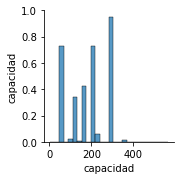

In [20]:
sns.pairplot(df)

### Examino el tamaño

In [21]:
print('El dataframe tiene',df.shape[0],'filas y',df.shape[1],'columnas.')

El dataframe tiene 3754 filas y 7 columnas.


### Nulos y VA
Analizamos nulos y valores faltantes:

In [22]:
missing_zero_values_table(df)

Empty DataFrame
Columns: [Zero Values, % of Zero Values, Missing Values, % of Missing Values, Total Missing Values, % Total Missing Values]
Index: []

'Your selected dataframe has 7 columns and 3754 Rows.\nThere are 0 columns that have missing values.'

### Duplicated

In [23]:
duplicates = df[df.duplicated()]
print('La cantidad de elementos duplicados es:', duplicates.shape[0])

La cantidad de elementos duplicados es: 0


In [24]:
# Elimino duplicados

#df_drop_duplicates=df.drop_duplicates()
#df_drop_duplicates.shape

#print('La cantidad de elementos sin duplicados es:', df_drop_duplicates.shape[0])

## TS EDA

Exploratory Data Analysis of Time Series 

### Verifico llenado de valores faltantes en serie de tiempo diara

Objetivo 1: La distribución de los datos debe ser diaria. No deben faltar fechas intermedias ni datos en ninguna fecha.

In [25]:
var = 'destino'
v1 = explore_var(df[var],var,limit=10)
display(v1)
print()


There are **10** different value in the **destino** variable of the dataframe.

The list of the first **10**  values:

unique_values  counts
0  A. D. Florencio Varela     417
1      A. D. Lomas Zamora     417
2           A. D. Campana     417
3       A. D. Jose C. Paz     417
4        A. D. San Martín     417
5         A. D. L. P. III     417
6          A. D. L. P. II     417
7        A. D. Avellaneda     417
8         A. D. Pettinato     417
9                     U.2       1

In [26]:
# filtro df por destino
# me quedo con la última y la primera fecha
# cuento cantidad de dias
# deben existir datos para esa cantidad de días

column_dim = 'destino'
# dim_target = 'A. D. San Martín'
# dim_target = 'A. D. Pettinato'
dim_target = 'A. D. L. P. III' 

df_destino = pd.DataFrame()
df_destino = df.loc[df[column_dim] == dim_target]

In [27]:
column_date = 'report_date'

date_min = min(df_destino[column_date])
date_max = max(df_destino[column_date])

delta = date_max - date_min
cantidad_fechas = delta.days + 1

fechas = df_destino[column_date]
unicos = fechas.nunique()

filas = df_destino.shape[0]

if unicos == filas:
    text1 = 'No hay fechas duplicadas.'
else:
    text1 = 'Error! Hay fechas duplicadas.'


if cantidad_fechas == filas:
    text2 = 'La cantintidad de filas coincide con la cantidad de fechas.'
else:
    text2 = 'Error! La cantintidad de filas NO coincide con la cantidad de fechas.'



# resampleo diario => igual cantidad de filas

print('El df tiene',df_destino.shape[0], 'filas con datos.')
print(text1)
print(text2)

El df tiene 417 filas con datos.
No hay fechas duplicadas.
La cantintidad de filas coincide con la cantidad de fechas.


In [28]:
# Genero serie de tiempo
ts = df_destino.set_index(column_date)


# Resampleo los datos para agrupar por acumulado diario
ts_D1 = pd.DataFrame()

column_target = 'capacidad'

ts_D1[column_target] = ts[column_target].resample('D').sum()
ts_D1['Year'] = ts_D1.index.year
ts_D1['Month'] = ts_D1.index.month
ts_D1['Day'] = ts_D1.index.day
ts_D1

capacidad  Year  Month  Day
report_date                             
2020-10-05         296  2020     10    5
2020-10-06         296  2020     10    6
2020-10-07         296  2020     10    7
2020-10-08         296  2020     10    8
2020-10-09         296  2020     10    9
...                ...   ...    ...  ...
2021-11-21         352  2021     11   21
2021-11-22         352  2021     11   22
2021-11-23         544  2021     11   23
2021-11-24         402  2021     11   24
2021-11-25         565  2021     11   25

[417 rows x 4 columns]

### TS Plotly

In [29]:
# Reseteo index para graficar

ts_D1_ = ts_D1.reset_index()

# Plot 
fig_1 = go.Figure()

# fig_1.add_trace(go.Scatter(x=ts_D1_[column_date], y=ts_D1_[column_target],mode='lines+markers',name='Capacidad'))
fig_1.add_trace(go.Scatter(x=ts_D1_[column_date], y=ts_D1_[column_target],mode='lines',name='Capacidad'))

fig_1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_1.update_layout(
    title="Capacidad por día en destino "+dim_target+" - Datos Llenados",
    width=990,
    height=600,
)
fig_1.show()

### Data original

In [30]:
URL = URL_PREFIX + "pd-alcdep-mult"

df_original = pd.DataFrame()
_, df_original = getEndpoint(URL,headers)
df_original

id report_date  destino  genero  capacidad   total  poblacion_presente  ingresos_pendientes  traslados_pendientes  libertades  ocupados  disponibles                          detalle              traslados_pendientes_txt
0     2695  2021-11-25       59       1        214  212.00                 209                   18                    20           0       207            7                                    U57X3 U2X5 U30X3 U17 U37X3 U38X4 U5
1     2686  2021-11-25       61       1         58   56.00                  56                    1                     2           0        55            3                                                                 U1 U28
2     2687  2021-11-25       62       1        244  242.00                 228                   14                     4           0       238            6                                                        U17X2   U35 U30
3     2673  2021-11-25       58       1         60   60.00                  58                    1                     4           0        55            5                                                        U39 U23 U17 U54
4     2688  2021-11-25       62       2        321   50.00                  46                    3                     2           1        46          275  LIBERTAD: MEZA PINTOS ALEJANDRA                                 U51X2
...    ...         ...      ...     ...        ...     ...                 ...                  ...                   ...         ...       ...          ...                              ...                                   ...
2690  2657  2020-10-05       60       1        156     NaN                 146                   12                     6           0       152            4                             NULL         U 24 U 23 U 36 U 31 U  35 X 2
2691  2658  2020-10-05       61       1         58     NaN                  48                    0                     0           1        48           10      Lib: REYNALDI GUETTE Hernan                                  NULL
2692  2659  2020-10-05       62       1        244     NaN                 236                    9                     4           0       241            3                             NULL                         U23 U24X2 U17
2693  2660  2020-10-05       63       1        210     NaN                 202                   11                     4           1       209            1   Lib: FERNANDEZ ESPINOSA Damian                        U30 U25 U2 U40
2694  2661  2020-10-05       64       1        156     NaN                 142                   16                    11           0       147            9                             NULL  U45(X3) U40 U57 U38(X3) U31 U54 U 23

[2695 rows x 14 columns]

In [31]:
original_redux = pd.DataFrame()
original_redux[column_date] = pd.to_datetime(df_original[column_date])
original_redux[column_target] = df_original[column_target] 
original_redux['Destino_ID'] = df_original[column_dim]

merge = pd.merge(original_redux,destinos_name,on='Destino_ID')
merge.rename(columns={'name': 'destino'}, inplace=True)
merge.drop('Destino_ID', axis=1, inplace=True)
merge['tipodestino'] = 'tipodestino' +'_id ' + merge['tipodestino'].astype(str)

original_redux = pd.DataFrame()
original_redux = merge.copy()


original_redux

report_date  capacidad           destino       unidad   complejo       tipodestino
0     2021-11-25        214  A. D. San Martín  A. D. S. M.  ALCAIDIAS  tipodestino_id 3
1     2021-11-24        214  A. D. San Martín  A. D. S. M.  ALCAIDIAS  tipodestino_id 3
2     2021-11-23        214  A. D. San Martín  A. D. S. M.  ALCAIDIAS  tipodestino_id 3
3     2021-11-05        214  A. D. San Martín  A. D. S. M.  ALCAIDIAS  tipodestino_id 3
4     2021-11-04        214  A. D. San Martín  A. D. S. M.  ALCAIDIAS  tipodestino_id 3
...          ...        ...               ...          ...        ...               ...
2690  2020-10-09        224     A. D. Campana     A. D. C.  ALCAIDIAS  tipodestino_id 3
2691  2020-10-08        224     A. D. Campana     A. D. C.  ALCAIDIAS  tipodestino_id 3
2692  2020-10-07        224     A. D. Campana     A. D. C.  ALCAIDIAS  tipodestino_id 3
2693  2020-10-06        224     A. D. Campana     A. D. C.  ALCAIDIAS  tipodestino_id 3
2694  2020-10-05        224     A. D. Campana     A. D. C.  ALCAIDIAS  tipodestino_id 3

[2695 rows x 6 columns]

In [32]:
df_destino_original = pd.DataFrame()
df_destino_original = original_redux.loc[original_redux[column_dim] == dim_target]
df_destino_original

report_date  capacidad          destino           unidad   complejo       tipodestino
522   2021-11-25        244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
523   2021-11-25        321  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
524   2021-11-24        250  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
525   2021-11-24        152  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
526   2021-11-23        244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
...          ...        ...              ...              ...        ...               ...
1039  2020-10-07         52  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
1040  2020-10-06         52  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
1041  2020-10-06        244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
1042  2020-10-05         52  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
1043  2020-10-05        244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3

[522 rows x 6 columns]

In [33]:
ts_original = df_destino_original.set_index(column_date)
ts_original

capacidad          destino           unidad   complejo       tipodestino
report_date                                                                          
2021-11-25         244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2021-11-25         321  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2021-11-24         250  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2021-11-24         152  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2021-11-23         244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
...                ...              ...              ...        ...               ...
2020-10-07          52  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2020-10-06          52  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2020-10-06         244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2020-10-05          52  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3
2020-10-05         244  A. D. L. P. III  A. D. L. P. III  ALCAIDIAS  tipodestino_id 3

[522 rows x 5 columns]

In [34]:
# Resampleo los datos para agrupar por acumulado diario
ts_original_D1 = pd.DataFrame()

In [35]:
ts_original_D1[column_target] = ts_original[column_target].resample('D').sum()
ts_original_D1['Year'] = ts_original_D1.index.year
ts_original_D1['Month'] = ts_original_D1.index.month
ts_original_D1['Day'] = ts_original_D1.index.day
ts_original_D1

capacidad  Year  Month  Day
report_date                             
2020-10-05         296  2020     10    5
2020-10-06         296  2020     10    6
2020-10-07         296  2020     10    7
2020-10-08         296  2020     10    8
2020-10-09         296  2020     10    9
...                ...   ...    ...  ...
2021-11-21           0  2021     11   21
2021-11-22           0  2021     11   22
2021-11-23         544  2021     11   23
2021-11-24         402  2021     11   24
2021-11-25         565  2021     11   25

[417 rows x 4 columns]

In [36]:
# Reseteo index para graficar

ts_original_D1_ = ts_original_D1.reset_index()
ts_original_D1_

report_date  capacidad  Year  Month  Day
0    2020-10-05        296  2020     10    5
1    2020-10-06        296  2020     10    6
2    2020-10-07        296  2020     10    7
3    2020-10-08        296  2020     10    8
4    2020-10-09        296  2020     10    9
..          ...        ...   ...    ...  ...
412  2021-11-21          0  2021     11   21
413  2021-11-22          0  2021     11   22
414  2021-11-23        544  2021     11   23
415  2021-11-24        402  2021     11   24
416  2021-11-25        565  2021     11   25

[417 rows x 5 columns]

In [37]:
# Plot 
fig_2 = go.Figure()

fig_2.add_trace(go.Scatter(x=ts_original_D1_[column_date], y=ts_original_D1_[column_target],mode='lines',name='Capacidad'))

fig_2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_2.update_layout(
    title="Capacidad por día en destino "+dim_target+" - Datos Originales",
    width=990,
    height=600,
)
fig_2.show()

### Original vs Poblada

In [38]:
# Plot 
fig_3 = go.Figure()

fig_3.add_trace(go.Scatter(x=ts_D1_[column_date], y=ts_original_D1_[column_target],mode='lines',name='Original'))
fig_3.add_trace(go.Scatter(x=ts_D1_[column_date], y=ts_D1_[column_target],mode='lines',name='Poblada'))

fig_3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_3.update_layout(
    title="Capacidad de Unidad por día - Original vs Poblada",
    width=990,
    height=600,
)
fig_3.show()

## Check populated tables

In [39]:

column_dim = 'destino'
column_date = 'report_date'
column_target = 'capacidad'

destinos = df[column_dim].value_counts().rename_axis('destino').reset_index(name='counts')

graph_data = list(range(0, destinos.shape[0]))
graph_name = list(range(0, destinos.shape[0]))

for index, row in destinos.iterrows():
    d = row['destino']

    # filtro df por destino
    # me quedo con la última y la primera fecha
    # cuento cantidad de dias
    # deben existir datos para esa cantidad de días
    # resampleo diario => igual cantidad de filas ?
    # no deberia tener valores en cero

    print('------------------------------------------')
    print(d)
    

    df_destino = pd.DataFrame()
    df_destino = df.loc[df[column_dim] == d]

    date_min = min(df_destino[column_date])
    date_max = max(df_destino[column_date])

    delta = date_max - date_min
    cantidad_fechas = delta.days + 1

    fechas = df_destino[column_date]
    unicos = fechas.nunique()
    filas = df_destino.shape[0]

    ts = pd.DataFrame()
    ts = df_destino.set_index(column_date)


    ts_D1 = pd.DataFrame()
    ts_D1[column_target] = ts[column_target].resample('D').sum()
    filas_ts = ts_D1.shape[0]

    ts_D1_ = ts_D1.reset_index()
    graph_data[index] = ts_D1_
    graph_name[index] = d

    zero_val=df_destino[column_target].isin([0]).sum(axis=0)

    if unicos == filas:
        text1 = 'OK: No hay fechas duplicadas.'
    else:
        text1 = 'Error! Hay fechas duplicadas.'


    if cantidad_fechas == filas:
        text2 = 'OK: La cantidad de filas coincide con la cantidad de fechas.'
    else:
        text2 = 'Error! La cantidad de filas NO coincide con la cantidad de fechas.'


    if filas_ts == filas:
        text3 = 'OK: La ts filas = df filas.'
    else:
        text3 = 'Error! La cantidad de filas del df NO coincide con la cantidad de filas del ts.'

    if zero_val == 0:
        text4 ='OK: No tiene valores en CERO.'
    else:
        text4 = 'Error! Tiene CEROS'

    print('El df tiene',df_destino.shape[0], 'filas con datos.')
    print('date_min',date_min, 'date_max',date_max)
    print(text1)
    print(text2)
    print(text3)
    print(text4)
    
    print()


------------------------------------------
A. D. Florencio Varela
El df tiene 417 filas con datos.
date_min 2020-10-05 00:00:00 date_max 2021-11-25 00:00:00
OK: No hay fechas duplicadas.
OK: La cantidad de filas coincide con la cantidad de fechas.
OK: La ts filas = df filas.
OK: No tiene valores en CERO.

------------------------------------------
A. D. Lomas Zamora
El df tiene 417 filas con datos.
date_min 2020-10-05 00:00:00 date_max 2021-11-25 00:00:00
OK: No hay fechas duplicadas.
OK: La cantidad de filas coincide con la cantidad de fechas.
OK: La ts filas = df filas.
OK: No tiene valores en CERO.

------------------------------------------
A. D. Campana
El df tiene 417 filas con datos.
date_min 2020-10-05 00:00:00 date_max 2021-11-25 00:00:00
OK: No hay fechas duplicadas.
OK: La cantidad de filas coincide con la cantidad de fechas.
OK: La ts filas = df filas.
OK: No tiene valores en CERO.

------------------------------------------
A. D. Jose C. Paz
El df tiene 417 filas con datos

In [40]:
# stop_date = datetime.datetime.strptime('2021-12-21','%Y-%m-%d')
# report_date = datetime.datetime.strptime('2021-12-21','%Y-%m-%d')

# diff_between = stop_date - report_date
            
# print('diff_between',diff_between)
# print('diff_between.days',diff_between.days)

### Grafico TS

In [41]:
graph_data[0]
graph_data[0][column_date]
graph_data[0][column_target]

0      128
1      128
2      128
3      128
4      128
      ... 
412     90
413     90
414     90
415     90
416     90
Name: capacidad, Length: 417, dtype: int64

In [42]:


# Plot 
fig_4 = go.Figure()

fig_4.add_trace(go.Scatter(x=graph_data[0][column_date], y=graph_data[0][column_target],mode='lines',name=graph_name[0]))
fig_4.add_trace(go.Scatter(x=graph_data[1][column_date], y=graph_data[1][column_target],mode='lines',name=graph_name[1]))
fig_4.add_trace(go.Scatter(x=graph_data[2][column_date], y=graph_data[2][column_target],mode='lines',name=graph_name[2]))
fig_4.add_trace(go.Scatter(x=graph_data[3][column_date], y=graph_data[3][column_target],mode='lines',name=graph_name[3]))
fig_4.add_trace(go.Scatter(x=graph_data[4][column_date], y=graph_data[4][column_target],mode='lines',name=graph_name[4]))
fig_4.add_trace(go.Scatter(x=graph_data[5][column_date], y=graph_data[5][column_target],mode='lines',name=graph_name[5]))
fig_4.add_trace(go.Scatter(x=graph_data[6][column_date], y=graph_data[6][column_target],mode='lines',name=graph_name[6]))
fig_4.add_trace(go.Scatter(x=graph_data[7][column_date], y=graph_data[7][column_target],mode='lines',name=graph_name[7]))
fig_4.add_trace(go.Scatter(x=graph_data[8][column_date], y=graph_data[8][column_target],mode='lines',name=graph_name[8]))

fig_4.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_4.update_layout(
    title="Capacidad de Destinos por día",
    width=990,
    height=600,
)
fig_4.show()